<a href="https://colab.research.google.com/github/jds1223/Company-Bankruptcy-Prediction-/blob/main/DSBA_6156_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSBA 6156 Final Report - Machine Learningredients, Group 10**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.multivariate.pca import PCA
from tabulate import tabulate


In [ ]:
url = 'https://raw.githubusercontent.com/jds1223/Company-Bankruptcy-Prediction-/main/data.csv'
df = pd.read_csv(url)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
#look at the datatypes of the dataset to determine if any columns need to be converted -> good: all floats or integers
df.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [ ]:
#quick overview of statistical descriptions of features
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.info() #6819 entries, 96 features, all non-null but let's make sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
#check for missing data -> confirmed: no null values
df.isna().sum().sum()

0

In [ ]:
#check for duplicate values -> no duplicates
df.duplicated().sum()

0

0    6599
1     220
Name: Bankrupt?, dtype: int64

Not Bankrupt:  97 %
Bankrupt:  3 %


Text(0.5, 1.0, 'Distribution of Target Value')

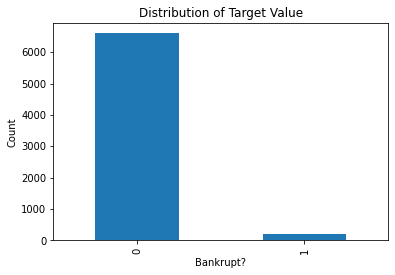

In [ ]:
#look at the distribution of the dataset -> severely uneven
print(df["Bankrupt?"].value_counts())
print()
print("Not Bankrupt: ", round(6599/(6599+220)*100), '%')
print("Bankrupt: ", round(220/(6599+220)*100), '%')
df["Bankrupt?"].value_counts().plot(kind='bar')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.title('Distribution of Target Value')

In [ ]:
#stratify target feature to keep the same distribution 
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

Now, let's apply dimensionality reduction techniques to see if we can decrease the feature space.

In [ ]:
#Using GBT for feature space reduction
gbt = GradientBoostingClassifier()
gbt.fit(X,y)
#Getting importance scores
feat_imp =gbt.feature_importances_
feat_imp = np.array(feat_imp)
col = np.array(df.columns)
col = col[1:]

([<matplotlib.axis.YTick at 0x7f6213c56760>,
 <a list of 5 Text major ticklabel objects>)

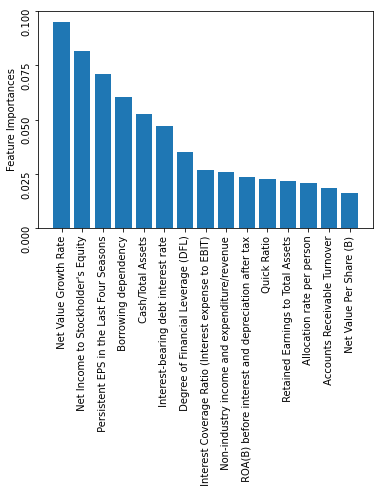

In [ ]:
#Getting importance scores
feat_imp =gbt.feature_importances_
feat_imp = np.array(feat_imp)
col = np.array(df.columns)
col = col[1:]
#Making dataframe for visualization
feat_imp_df = np.transpose(pd.DataFrame(
    {'features': col,
    'Importances': feat_imp}))

#Sorting importances in descending order
feat_imp_df = feat_imp_df.sort_values(['Importances'],axis=1,ascending=False)
#formatting
top_features_df = np.transpose(feat_imp_df)[:15]
#%%
#Plotting
fig, ax = plt.subplots()
plt.bar(top_features_df['features'],top_features_df['Importances'])
plt.ylabel('Feature Importances')
plt.xticks(np.arange(0, 15, step=1),fontsize=10,rotation=90)
plt.yticks(np.arange(0,.125,step=.025),rotation = 90)

In [ ]:
#Run models with reduced feature space #### with less features
#Train, test split 
#stratify target feature to keep the same distribution 
X = df[top_features_df['features']]
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

#Logistic Regression, accuracy score = 0.968 with less features
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_pred_log,y_test)
print("Test set accuracy of Logistic Regression: {:.3f}".format(acc_log))
#CART, accuracy score = 0.957
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_pred_dt,y_test)
print("Test set accuracy of CART: {:.3f}".format(acc_dt))
#Random Forest, accuracy score = 0.971
rf = RandomForestClassifier(random_state=1) 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_pred_rf,y_test)
print("Test set accuracy of Random Forest: {:.3f}".format(acc_rf))
#Gradient Boosting, accuracy score = 0.972
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
acc_gbt = accuracy_score(y_pred_gb,y_test)
print("Test set accuracy of Gradient Boosting: {:.3f}".format(acc_gbt))


Test set accuracy of Logistic Regression: 0.968
Test set accuracy of CART: 0.959
Test set accuracy of Random Forest: 0.973
Test set accuracy of Gradient Boosting: 0.971


In [ ]:
#Results table
results = [['Logistic Accuracy Score','RF Accuracy Score','GBT Accuracy Score'], [acc_log,acc_rf,acc_gbt]]
print(tabulate(results))

-----------------------  ------------------  ------------------
Logistic Accuracy Score  RF Accuracy Score   GBT Accuracy Score
0.967741935483871        0.9731182795698925  0.9711632453567938
-----------------------  ------------------  ------------------


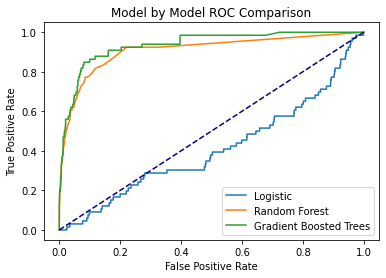

In [ ]:
#ROC plotting
#define metrics
#logistic
y_log_score = logreg.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_score)
auc_log = roc_auc_score(y_test, y_log_score)
#rf 
y_rf_score = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_score)
auc_rf = roc_auc_score(y_test, y_rf_score)
#gbt
y_gb_score = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_gb_score)
auc_gb = roc_auc_score(y_test, y_gb_score)
#create ROC curve
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_rf,tpr_rf)
plt.plot(fpr_gb,tpr_gb)
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Model by Model ROC Comparison')
plt.legend(['Logistic','Random Forest','Gradient Boosted Trees'])
plt.show()


Now, let us take a look at the correlation of the 15 selected variables to ensure that the gbt algorithm did what it was supposed to.

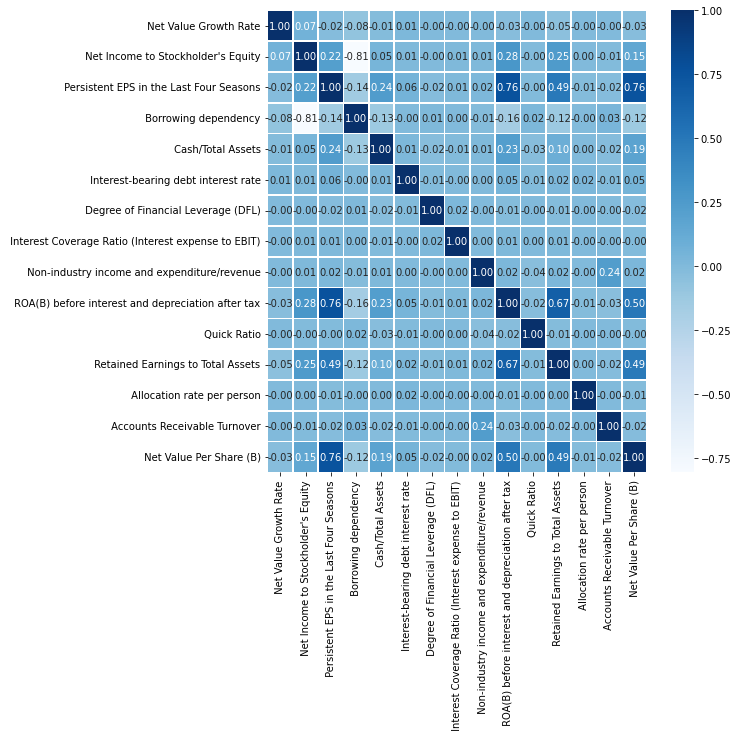

In [ ]:
# Load dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jds1223/Company-Bankruptcy-Prediction-/main/data.csv')
dataset = dataset[top_features_df['features']]
pca = PCA(dataset, standardize=True, method='eig')
normalized_dataset = pca.transformed_data
# Covariance Matrix
# bias =True, so dataset is normalized
# rowvar = False, each column represents a variable, i.e., a feature. This way we compute the covariance of features as whole instead of the covariance of each row
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=dataset.columns)
# Plot Covariance Matrix
plt.subplots(figsize=(8.5, 8.5))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', yticklabels=dataset.columns)
plt.show()


Notice that there is one variable which is highly correlated with two others. Let us remove that variable and see how model performance is affected. 